## Representation Testing

In [82]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

simulator = AerSimulator()

In [83]:
from qiskit import QuantumCircuit, transpile

# Create a Quantum Circuit with 4 qubits
qc = QuantumCircuit(4)

# Add gates that act on different qubits in parallel
qc.h(0)        # Hadamard gate on qubit 0
qc.x(1)        # X gate on qubit 1
qc.cx(2, 3)    # Controlled-X gate (CNOT) between qubits 2 and 3

# Visualize the circuit
print(qc)

     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘


['011', '110', '011', '010', '110', '001', '101', '011', '000', '000', '011', '001', '010', '011', '100', '111', '111', '100', '110', '101', '101', '100', '111', '110', '101', '001', '110', '000', '011', '110', '100', '011', '010', '011', '011', '000', '000', '001', '101', '101', '100', '111', '100', '011', '010', '001', '101', '010', '001', '100', '001', '101', '101', '001', '101', '011', '001', '010', '010', '000', '001', '010', '010', '011', '100', '100', '101', '111', '011', '111', '100', '000', '100', '011', '110', '110', '101', '000', '110', '011', '001', '010', '001', '000', '010', '010', '111', '010', '000', '000', '010', '000', '000', '011', '011', '000', '011', '011', '111', '001', '001', '101', '000', '001', '101', '101', '111', '011', '010', '111', '100', '111', '000', '111', '101', '100', '101', '111', '110', '011', '101', '010', '010', '010', '011', '111', '011', '000', '111', '010', '001', '101', '010', '011', '010', '010', '110', '000', '010', '101', '111', '000', '110'

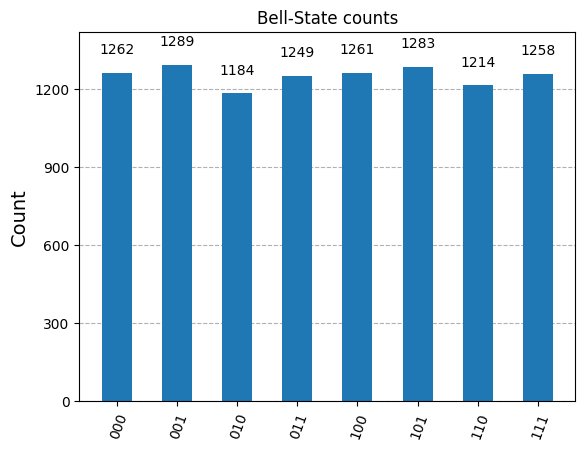

In [84]:
# Create circuit
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.h(2)


circ.cx(1, 2)
circ.h(0)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ, shots=10000, memory=True).result()
memory = result.get_memory(circ)
counts = result.get_counts(circ)
print(memory)
print(circ)
print(circ.depth())
plot_histogram(counts, title='Bell-State counts')


Representation 1

In [126]:
qubits = 3
max_circuit_depth = 5
circuit_chromosome = [["w" for i in range(qubits)] for i in range(max_circuit_depth)]

test_circuit = QuantumCircuit(qubits)

chromosome_qiskit_gate_map = {
    "w": test_circuit.barrier,  # Use barrier for blank "wires"
    "x": test_circuit.x,
    "y": test_circuit.y,
    "z": test_circuit.z,
    "h": test_circuit.h,
    "s": test_circuit.s,
    "t": test_circuit.t,
    "cx": test_circuit.cx,
    "ch": test_circuit.ch,
    "cs": test_circuit.cs,
    "ct": test_circuit.barrier
}

test_circuit_chromosome = [['h', 'w', 'w'], ['cs(1,0)', 'w', 'w'], ['ct(2,0)', 'w', 'w'], ['w', 'h', 'w'], ['w', 'cs(2,1)', 'w'], ['w', 'w', 'h']]
print(test_circuit_chromosome)

for block in test_circuit_chromosome:
    for qubit in range(len(block)):
        if len(block[qubit]) == 1:
            chromosome_qiskit_gate_map[block[qubit]](qubit)
        else:
            control_target_qubits = block[qubit][2:].rstrip(")").lstrip("(").split(",")
            chromosome_qiskit_gate_map[block[qubit][:2]](int(control_target_qubits[0]), int(control_target_qubits[1]))
            

test_circuit.measure_all()

print(test_circuit)
print(test_circuit.depth())

[['h', 'w', 'w'], ['cs(1,0)', 'w', 'w'], ['ct(2,0)', 'w', 'w'], ['w', 'h', 'w'], ['w', 'cs(2,1)', 'w'], ['w', 'w', 'h']]
        ┌───┐┌───┐    ░  ░   ░    ░           ░ ┌─┐      
   q_0: ┤ H ├┤ S ├────░──░───░────░───────────░─┤M├──────
        └─░─┘└─┬─┘ ░  ░  ░ ┌───┐┌───┐ ░       ░ └╥┘┌─┐   
   q_1: ──░────■───░─────░─┤ H ├┤ S ├─░───────░──╫─┤M├───
          ░    ░   ░  ░  ░ └─░─┘└─┬─┘ ░ ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ──░────░──────░──░───░────■───░─┤ H ├─░──╫──╫─┤M├
          ░    ░      ░  ░   ░        ░ └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════╩══╩══╩═
                                                 0  1  2 
6


          ░  ┌───┐  ░  ┌───┐  ░   ░ ┌─┐      
   q_0: ──░──┤ H ├──░──┤ X ├──░───░─┤M├──────
        ┌───┐├───┤┌───┐├───┤  ░   ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ X ├┤ H ├┤ X ├──░───░──╫─┤M├───
        └─░─┘└─░─┘├───┤└─░─┘┌───┐ ░  ║ └╥┘┌─┐
   q_2: ──░────░──┤ H ├──░──┤ X ├─░──╫──╫─┤M├
          ░    ░  └───┘  ░  └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════╩══╩══╩═
                                     0  1  2 
5
['111', '110', '111', '010', '011', '011', '010', '011', '011', '011', '111', '010', '110', '010', '011', '011', '110', '110', '110', '110', '010', '111', '110', '010', '010', '011', '111', '011', '010', '110', '011', '011', '111', '111', '011', '011', '110', '110', '110', '011', '011', '010', '110', '110', '011', '010', '011', '110', '110', '011', '011', '110', '011', '111', '011', '111', '010', '010', '111', '011', '011', '011', '111', '010', '110', '011', '010', '011', '010', '010', '011', '110', '111', '011', '010', '111', '011', '011', '111', '110', '111', '011', '110', '0

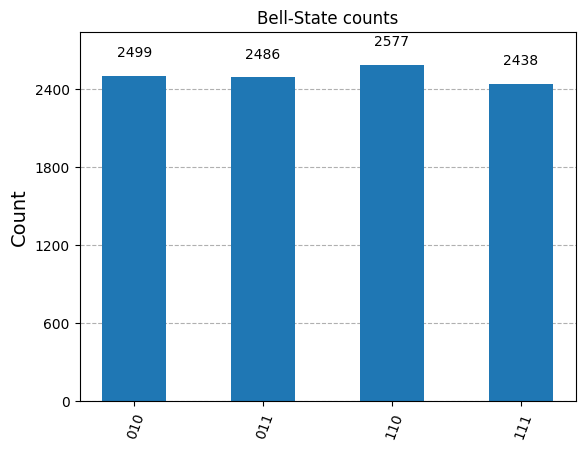

In [ ]:
# Transpile for simulator
simulator = AerSimulator()
test_circuit_transpiled = transpile(test_circuit, simulator)

# Run and get counts
result = simulator.run(test_circuit_transpiled, shots=10000, memory=True).result()
memory = result.get_memory(test_circuit_transpiled)
counts = result.get_counts(test_circuit_transpiled)
print(memory)
print(test_circuit_transpiled)
plot_histogram(counts, title='Bell-State counts')
